In [87]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import Angle
from photutils.aperture import RectangularAperture
fn = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes/cubes/internal-cal/CRSA00165895_cube.fits'

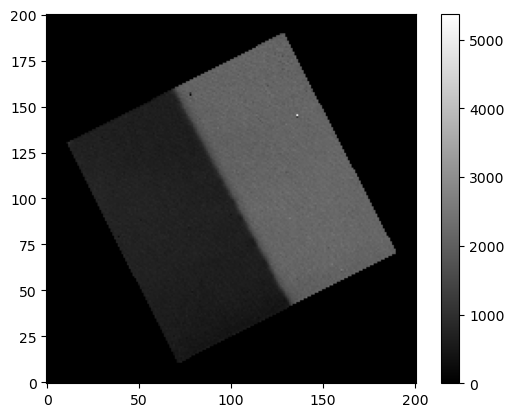

In [88]:
from astropy.io import fits
#plot image 
hdul = fits.open(fn)
image_header = hdul[1].header
image_data = hdul[1].data
plt.imshow(image_data[7], origin='lower', cmap='gray')
plt.colorbar()
plt.show()



In [89]:
# finding rectangle params

# define rectangle bounds (found by eye in ds9)

topleft_lbeam = np.array([13,130])
bottomleft_lbeam = np.array([72,12])
bottomright_lbeam = np.array([133,43])
topright_lbeam = np.array([69,160])
topleft_rbeam = np.array([71,160])
topright_rbeam = np.array([130,190])
bottomright_rbeam = np.array([190,71])
bottomleft_rbeam = np.array([135,44])

# calculate width, height, center, and rotation of rectangle

width_lbeam = np.linalg.norm(bottomleft_lbeam - bottomright_lbeam)
width_rbeam = np.linalg.norm(bottomleft_rbeam - bottomright_rbeam)
# note - different widths
height_lbeam = np.linalg.norm(topleft_lbeam - bottomleft_lbeam)
height_rbeam = np.linalg.norm(topleft_rbeam - bottomleft_rbeam)
# averaging heights for greater accuracy
height = (height_lbeam + height_rbeam) / 2
centroid_lbeam = (topleft_lbeam + bottomleft_lbeam + bottomright_lbeam + topright_lbeam) / 4
centroid_rbeam = (topleft_rbeam + bottomleft_rbeam + bottomright_rbeam + topright_rbeam) / 4
# centroids are similar to eyeballed values
theta_lbeam = np.arctan2(bottomright_lbeam[1] - bottomleft_lbeam[1], bottomright_lbeam[0] - bottomleft_lbeam[0])
theta_rbeam = np.arctan2(bottomright_rbeam[1] - bottomleft_rbeam[1], bottomright_rbeam[0] - bottomleft_rbeam[0])
theta_lbeam = np.degrees(theta_lbeam)
theta_rbeam = np.degrees(theta_rbeam)
# average theta values for greater accuracy
theta = (theta_lbeam + theta_rbeam) / 2 # degrees are defined as positive=ccw

# shrink rectangle by 10% to avoid edge effects

shrunkwidth_lbeam = width_lbeam * 0.9
shrunkwidth_rbeam = width_rbeam * 0.9
shrunkheight = height * 0.9






In [90]:
# define 2 rectangular apertures
aperture_lbeam = RectangularAperture(centroid_lbeam, shrunkwidth_lbeam, shrunkheight, theta=theta_lbeam)
aperture_rbeam = RectangularAperture(centroid_rbeam, shrunkwidth_rbeam, shrunkheight, theta=theta_rbeam)

